
-------------------------------------------------Loan Default Prediction-------------------------------------------------------------------------



Import Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pickle

import Dataset

In [2]:
data = pd.read_csv("loan_default.csv")
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46.0,84208.0,129188.0,451.0,NaN,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60.0,NaN,9139.0,633.0,8.0,4.0,NaN,48.0,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


Initial Data Inspection


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          245153 non-null  object 
 1   Age             245385 non-null  float64
 2   Income          245382 non-null  float64
 3   LoanAmount      245514 non-null  float64
 4   CreditScore     245212 non-null  float64
 5   MonthsEmployed  245304 non-null  float64
 6   NumCreditLines  245335 non-null  float64
 7   InterestRate    245460 non-null  float64
 8   LoanTerm        245432 non-null  float64
 9   DTIRatio        245290 non-null  float64
 10  Education       245227 non-null  object 
 11  EmploymentType  245301 non-null  object 
 12  MaritalStatus   245326 non-null  object 
 13  HasMortgage     245414 non-null  object 
 14  HasDependents   245403 non-null  object 
 15  LoanPurpose     245300 non-null  object 
 16  HasCoSigner     245331 non-null  object 
 17  Default   

In [4]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          245153 non-null  object 
 1   Age             245385 non-null  float64
 2   Income          245382 non-null  float64
 3   LoanAmount      245514 non-null  float64
 4   CreditScore     245212 non-null  float64
 5   MonthsEmployed  245304 non-null  float64
 6   NumCreditLines  245335 non-null  float64
 7   InterestRate    245460 non-null  float64
 8   LoanTerm        245432 non-null  float64
 9   DTIRatio        245290 non-null  float64
 10  Education       245227 non-null  object 
 11  EmploymentType  245301 non-null  object 
 12  MaritalStatus   245326 non-null  object 
 13  HasMortgage     245414 non-null  object 
 14  HasDependents   245403 non-null  object 
 15  LoanPurpose     245300 non-null  object 
 16  HasCoSigner     245331 non-null  object 
 17  Default   

In [5]:
data.duplicated().sum()

0

In [6]:
data.head()
data = data.drop('LoanID', axis=1)

Data Preprocessing


In [7]:
for col in ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\purwa\AppData\Local\Temp\ipykernel_26024\3362892492.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  float64
 1   Income          255347 non-null  float64
 2   LoanAmount      255347 non-null  float64
 3   CreditScore     255347 non-null  float64
 4   MonthsEmployed  255347 non-null  float64
 5   NumCreditLines  255347 non-null  float64
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  float64
 8   DTIRatio        255347 non-null  float64
 9   Education       245227 non-null  object 
 10  EmploymentType  245301 non-null  object 
 11  MaritalStatus   245326 non-null  object 
 12  HasMortgage     245414 non-null  object 
 13  HasDependents   245403 non-null  object 
 14  LoanPurpose     245300 non-null  object 
 15  HasCoSigner     245331 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [9]:
for col in ['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']:
    data[col].fillna(data[col].mode()[0], inplace=True)
data.info()

C:\Users\purwa\AppData\Local\Temp\ipykernel_26024\151089018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  float64
 1   Income          255347 non-null  float64
 2   LoanAmount      255347 non-null  float64
 3   CreditScore     255347 non-null  float64
 4   MonthsEmployed  255347 non-null  float64
 5   NumCreditLines  255347 non-null  float64
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  float64
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [10]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46.0,84208.0,129188.0,451.0,60.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60.0,82468.5,9139.0,633.0,8.0,4.0,13.46,48.0,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [11]:
for col in ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.2f}%)")

Age: 0 outliers (0.00%)
Income: 0 outliers (0.00%)
LoanAmount: 0 outliers (0.00%)
CreditScore: 0 outliers (0.00%)
MonthsEmployed: 0 outliers (0.00%)
NumCreditLines: 0 outliers (0.00%)
InterestRate: 0 outliers (0.00%)
LoanTerm: 0 outliers (0.00%)
DTIRatio: 0 outliers (0.00%)


In [12]:
data.head(10)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46.0,84208.0,129188.0,451.0,60.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60.0,82468.5,9139.0,633.0,8.0,4.0,13.46,48.0,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,25.0,90298.0,90448.0,720.0,18.0,2.0,22.72,24.0,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,38.0,111188.0,177025.0,429.0,80.0,1.0,19.11,12.0,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,No,0
7,56.0,126802.0,155511.0,531.0,67.0,4.0,8.15,60.0,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,36.0,42053.0,127554.5,827.0,83.0,1.0,23.94,48.0,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,40.0,132784.0,228510.0,480.0,114.0,4.0,9.09,48.0,0.33,High School,Self-employed,Married,Yes,No,Business,Yes,0


In [13]:
le = LabelEncoder()

In [14]:
for col in ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']:
    data[col] = le.fit_transform(data[col])
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,0,0,0,1,1,4,1,0
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,2,0,1,0,0,4,1,0
2,46.0,84208.0,129188.0,451.0,60.0,3.0,21.17,24.0,0.31,2,3,0,1,1,0,0,1
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,1,0,1,0,0,1,0,0
4,60.0,82468.5,9139.0,633.0,8.0,4.0,13.46,48.0,0.73,0,3,0,0,1,0,0,0


In [15]:
# ss = StandardScaler()

In [16]:
# for col in ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']:
#     data[col] = ss.fit_transform(data[[col]])
# data.head()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  float64
 1   Income          255347 non-null  float64
 2   LoanAmount      255347 non-null  float64
 3   CreditScore     255347 non-null  float64
 4   MonthsEmployed  255347 non-null  float64
 5   NumCreditLines  255347 non-null  float64
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  float64
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  int32  
 10  EmploymentType  255347 non-null  int32  
 11  MaritalStatus   255347 non-null  int32  
 12  HasMortgage     255347 non-null  int32  
 13  HasDependents   255347 non-null  int32  
 14  LoanPurpose     255347 non-null  int32  
 15  HasCoSigner     255347 non-null  int32  
 16  Default         255347 non-null  int64  
dtypes: float64

In [18]:
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  float64
 1   Income          255347 non-null  float64
 2   LoanAmount      255347 non-null  float64
 3   CreditScore     255347 non-null  float64
 4   MonthsEmployed  255347 non-null  float64
 5   NumCreditLines  255347 non-null  float64
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  float64
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  int32  
 10  EmploymentType  255347 non-null  int32  
 11  MaritalStatus   255347 non-null  int32  
 12  HasMortgage     255347 non-null  int32  
 13  HasDependents   255347 non-null  int32  
 14  LoanPurpose     255347 non-null  int32  
 15  HasCoSigner     255347 non-null  int32  
 16  Default         255347 non-null  int64  
dtypes: float64

Exploratory Data Analysis (EDA)


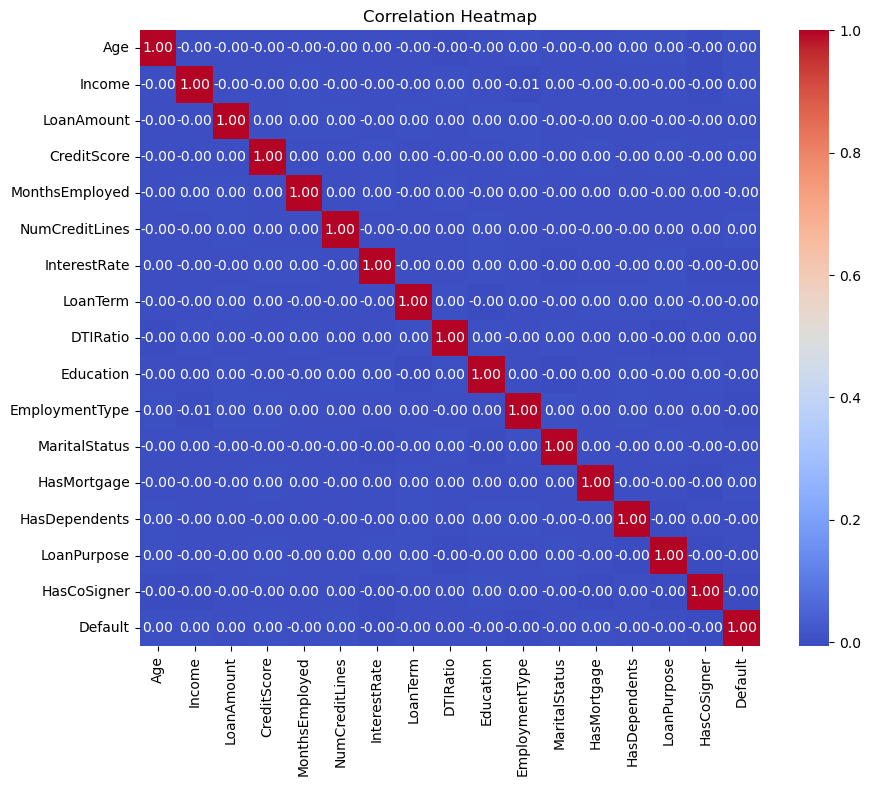

In [19]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

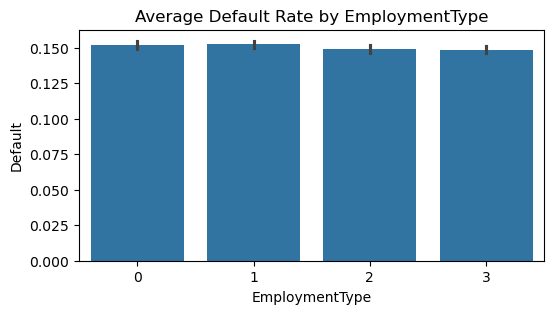

In [20]:
plt.figure(figsize=(6,3))
sns.barplot(x='EmploymentType', y='Default', data=df)
plt.title('Average Default Rate by EmploymentType')
plt.show()

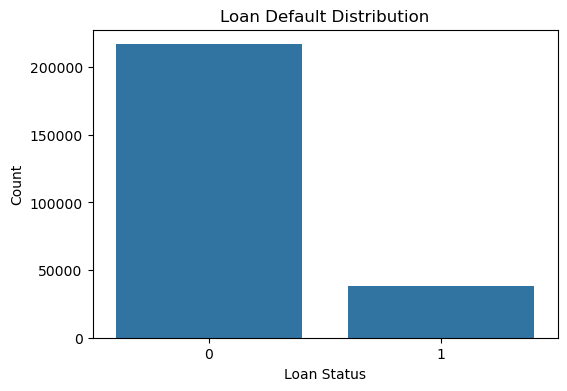

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Default', data=df)
plt.title('Loan Default Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

<Figure size 1500x1000 with 0 Axes>

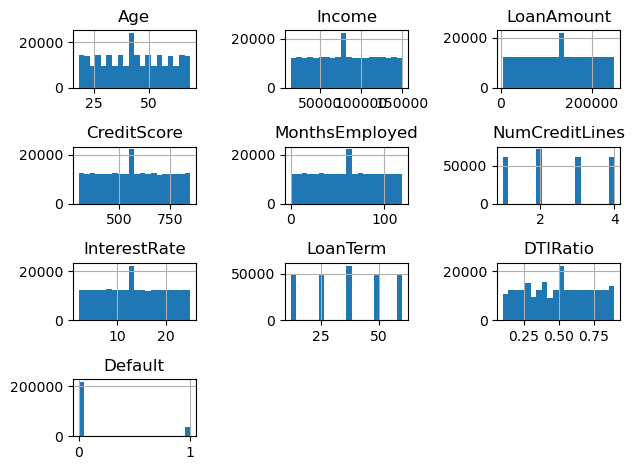

In [22]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions
plt.figure(figsize=(15,10))
df[num_cols].hist(bins=20)
plt.tight_layout()
plt.show()

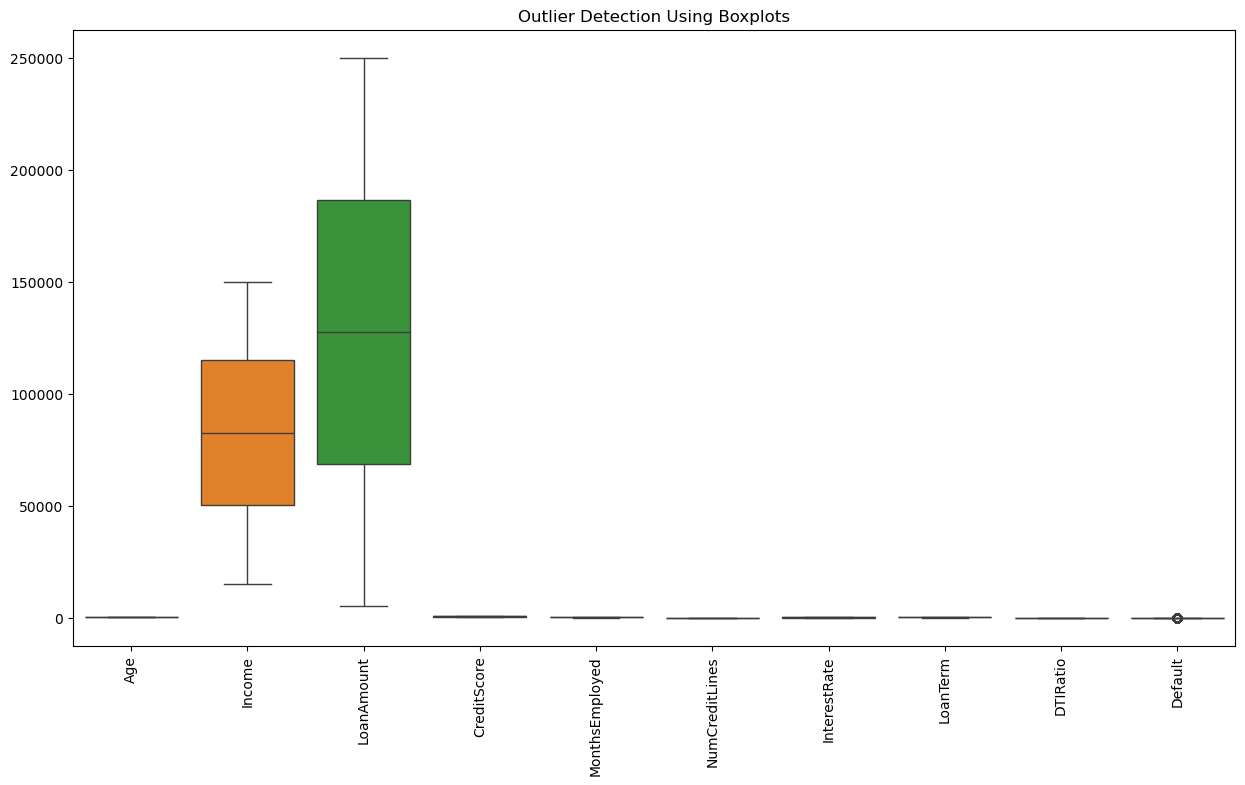

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title('Outlier Detection Using Boxplots')
plt.show()


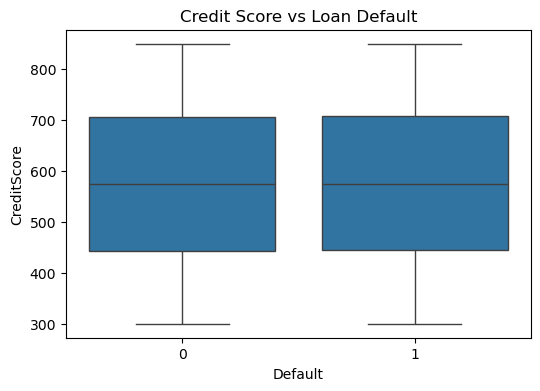

In [24]:
#CreditScore vs LoanDefault
plt.figure(figsize=(6,4))
sns.boxplot(x='Default', y='CreditScore', data=df)
plt.title('Credit Score vs Loan Default')
plt.show()


Model Training

In [25]:
x = data.drop('Default', axis=1)
y = data['Default']
x

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,0,0,0,1,1,4,1
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,2,0,1,0,0,4,1
2,46.0,84208.0,129188.0,451.0,60.0,3.0,21.17,24.0,0.31,2,3,0,1,1,0,0
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,1,0,1,0,0,1,0
4,60.0,82468.5,9139.0,633.0,8.0,4.0,13.46,48.0,0.73,0,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19.0,37979.0,210682.0,541.0,109.0,4.0,14.11,12.0,0.85,0,0,1,0,0,1,0
255343,32.0,51953.0,189899.0,511.0,14.0,2.0,11.55,24.0,0.21,1,1,0,0,0,3,0
255344,56.0,84820.0,208294.0,597.0,70.0,3.0,5.29,60.0,0.50,1,2,1,1,1,0,1
255345,42.0,85109.0,60575.0,809.0,40.0,1.0,20.90,48.0,0.44,1,1,2,1,1,4,0


In [26]:
y

0         0
1         0
2         1
3         0
4         0
         ..
255342    1
255343    1
255344    1
255345    1
255346    1
Name: Default, Length: 255347, dtype: int64

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(x_train)
X_test_scaled = ss.transform(x_test)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled,y_train)
y_pred = lr_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.848896408039225


In [29]:
print(confusion_matrix(y_pred,y_test))

[[54191  9646]
 [    0     0]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     54191
           1       0.00      0.00      0.00      9646

    accuracy                           0.85     63837
   macro avg       0.42      0.50      0.46     63837
weighted avg       0.72      0.85      0.78     63837



c:\Users\purwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\purwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\purwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree 

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',class_weight='balanced', max_depth=6, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred_clf = clf.predict(X_test_scaled)



In [32]:
print(classification_report(y_pred_clf,y_test))

              precision    recall  f1-score   support

           0       0.03      0.83      0.06      2049
           1       0.96      0.15      0.26     61788

    accuracy                           0.17     63837
   macro avg       0.50      0.49      0.16     63837
weighted avg       0.93      0.17      0.25     63837



In [33]:
# from sklearn import tree
# plt.figure(figsize=(12,8))
# tree.plot_tree(clf, feature_names=df.columns[:-1], class_names=x, filled=True)
# plt.show()

KMans Clustering

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x_train)
    wcss.append(km.inertia_)
wcss


[1203107723248265.8,
 534745946446708.3,
 381838380456496.5,
 294087339014615.8,
 233578544586005.62,
 179644255143881.4,
 156158039581878.8,
 139956059673133.69,
 125496902795341.95,
 112767395682678.88]

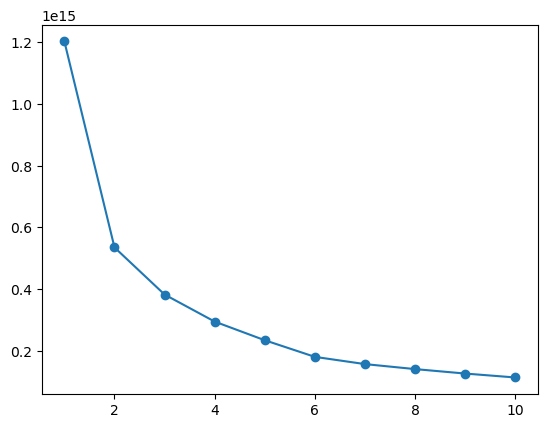

In [35]:
plt.plot(range(1,11),wcss,marker='o')

In [36]:
km = KMeans(n_clusters=3)
km.fit(x_train)
km.cluster_centers_

array([[4.34910180e+01, 8.25938898e+04, 2.09031868e+05, 5.73228370e+02,
        5.96130280e+01, 2.48171225e+00, 1.34466043e+01, 3.60454442e+01,
        5.01635054e-01, 1.43877650e+00, 1.47998058e+00, 9.95743648e-01,
        5.17527108e-01, 5.19113125e-01, 1.96190322e+00, 4.80223337e-01],
       [4.34457454e+01, 8.23688595e+04, 1.27293037e+05, 5.74747026e+02,
        5.96184387e+01, 2.48340721e+00, 1.35090192e+01, 3.60811851e+01,
        5.01001691e-01, 1.43480987e+00, 1.48008282e+00, 1.00282865e+00,
        5.21768926e-01, 5.18021696e-01, 1.96114254e+00, 4.78129010e-01],
       [4.34779344e+01, 8.26234363e+04, 4.55557231e+04, 5.73753304e+02,
        5.93766193e+01, 2.48141848e+00, 1.34987521e+01, 3.59305156e+01,
        4.99950929e-01, 1.43516095e+00, 1.47871958e+00, 9.97759094e-01,
        5.19154017e-01, 5.21035069e-01, 1.96010534e+00, 4.82285396e-01]])

In [37]:
# from sklearn.metrics import silhouette_score
# print(km.labels_)
# silhouette_score(x_train,km.labels_)

Agglomerative Clustering

In [38]:
# # AgglomerativeClustering is O(n^2) in memory and will fail on large datasets.
# # Use a representative subsample, or a scalable alternative. Here we sample and then
# # propagate cluster assignments to the full dataset using KMeans.
# from sklearn.cluster import AgglomerativeClustering

# sample_size = min(5000, scaledx.shape[0])
# rng = np.random.RandomState(42)
# idx = rng.choice(scaledx.shape[0], size=sample_size, replace=False)
# scaledx_sample = scaledx[idx]

# agc = AgglomerativeClustering(n_clusters=3, linkage='ward')
# trained_agc_sample = agc.fit_predict(scaledx_sample)

# # Propagate to full dataset via KMeans trained on the sampled clusters (KMeans is already available)
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(scaledx_sample)
# trained_agc = kmeans.predict(scaledx)  # labels for all points
# print("sample labels:", trained_agc_sample.shape, "full labels:", trained_agc.shape)


RandomForest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=12, n_jobs=-1, random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred = rf_model.predict(X_test_scaled)

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.848896408039225


c:\Users\purwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\purwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\purwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     54191
           1       0.00      0.00      0.00      9646

    accuracy                           0.85     63837
   macro avg       0.42      0.50      0.46     63837
weighted avg       0.72      0.85      0.78     63837


Confusion Matrix:
 [[54191     0]
 [ 9646     0]]


In [41]:
from sklearn.ensemble import HistGradientBoostingClassifier
import pickle

# SMOTE wala step (jo aapne pehle kiya)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# Fast Model: HistGradientBoosting (Ye 1 minute mein train ho jayega)
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_res, y_res)

# Evaluation
y_pred = model.predict(X_test_scaled)
print("Naya Classification Report:")
print(classification_report(y_test, y_pred))


Naya Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     54191
           1       0.00      0.00      0.00      9646

    accuracy                           0.85     63837
   macro avg       0.42      0.50      0.46     63837
weighted avg       0.72      0.85      0.78     63837



c:\Users\purwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\purwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\purwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
!pip install xgboost


Save Trained Model


In [43]:
# from imblearn.over_sampling import SMOTE
# from xgboost import XGBClassifier
# import pickle

# # Step 1: Data ko Order mein set karein
# cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 
#         'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 
#         'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# X = data[cols]
# y = data['Default']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 2: Scaling
# ss = StandardScaler()
# X_train_scaled = ss.fit_transform(X_train)
# X_test_scaled = ss.transform(X_test)

# # Step 3: SMOTE (Data Balance karne ke liye)
# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# # Step 4: Simple XGBoost (Bina weight ke taaki probability sahi aaye)
# model = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
# model.fit(X_res, y_res)

# # Step 5: Save
# pickle.dump(model, open("model.pkl", "wb"))
# pickle.dump(ss, open("scaler.pkl", "wb"))
# print("Model updated with Balanced Probability!")

In [44]:
# pickle.dump(rf_model, open("model.pkl", "wb"))
# pickle.dump(ss, open("scaler.pkl", "wb"))

# print("\nSuccess: model.pkl and scaler.pkl saved successfully!")

In [45]:
import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# ================================
# 1. Feature Lock
# ================================
num_cols = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
    'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'
]

cat_cols = [
    'Education', 'EmploymentType', 'MaritalStatus',
    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'
]

X = data[num_cols + cat_cols]
y = data['Default']

# ================================
# 2. Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ================================
# 3. Preprocessing
# ================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ================================
# 4. SMOTE (CORRECT)
# ================================
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(
    X_train_processed, y_train
)

# ================================
# 5. XGBoost (Probability Stable)
# ================================
model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_resampled, y_resampled)

# ================================
# 6. Save Artifacts
# ================================
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(preprocessor, open("preprocessor.pkl", "wb"))

print("✅ Model trained with consistent & deployable output")


✅ Model trained with consistent & deployable output
